# Formerly FordGoBikes
## by Tash 

## Investigation Overview

> Formerly known as Ford GoBikes, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California. In this investigation, I've looked at the bike ride trends and biker type of the bay Ford GoBike Share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.



## Dataset Overview

> This overivew explores the Ford GoBike's which is combined with the Baywheels trip data for public containing bike rides in the Bay Area from January 2019 to December 2019. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_master_cleaned = pd.read_csv('baywheels_master_clean.csv')

In [3]:
df_master_cleaned.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_time,user_type,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,...,2019-01-31 17:57:44.613,Subscriber,January,1,Thu,17,16,1347,5.305199,3.296497
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,...,2019-01-31 20:58:33.886,Subscriber,January,1,Thu,20,15,1098,3.859628,2.398261
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,...,2019-01-31 18:06:52.924,Customer,January,1,Thu,18,11,1043,3.287098,2.042508
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,...,2019-01-31 19:46:09.719,Customer,January,1,Thu,19,8,744,0.999632,0.621142
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,...,2019-01-31 14:19:01.541,Customer,January,1,Thu,14,7,1011,0.953355,0.592387


## Ford GoBike System Usage by Month¶


> As per the Ford GoBike System in 2019, July is the most popular month for using the Ford GoBike System with over 250,000 number of bike trips. Followed by March and October. 

<Figure size 841.68x595.44 with 0 Axes>

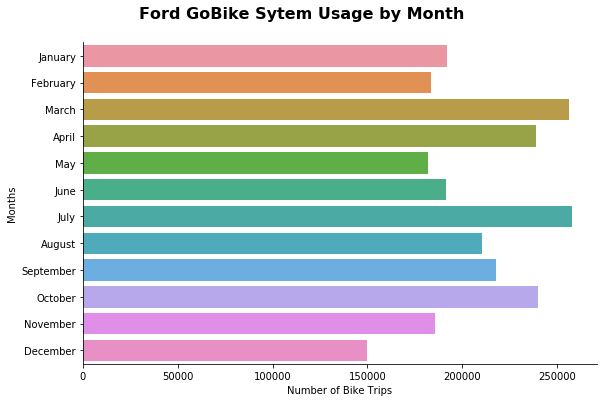

In [4]:
# Check Monthly usage 
plt.figure(figsize=[ 11.69, 8.27]);
graph = sb.catplot(data = df_master_cleaned, y = 'start_time_month', 
                   kind = 'count', aspect = 1.7);
graph.set_axis_labels('Number of Bike Trips', 'Months');
graph.fig.suptitle('Ford GoBike Sytem Usage by Month', y = 1.07, fontsize = 16, fontweight = 'bold');

## Ford GoBike System Usage by Trip Duration

> This show the Distrubtion of the overall Ford GoBike System trip duartion in seconds lasting around 11.6667 minutes or 700 seconds.



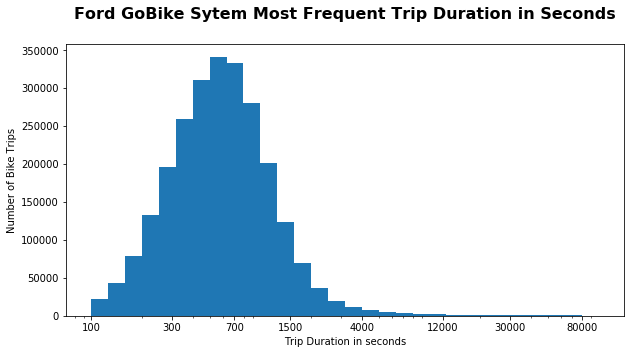

In [5]:
#Check the most frequent Trip duration in seconds 
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_master_cleaned, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration in seconds')
plt.ylabel('Number of Bike Trips')
plt.title('Ford GoBike Sytem Most Frequent Trip Duration in Seconds', y = 1.07, fontsize = 16, fontweight = 'bold');
plt.show();

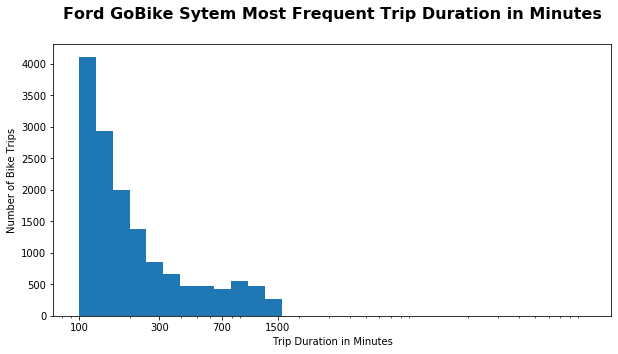

In [6]:
#Check the most frequent Trip duration in minutes 
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_master_cleaned, x='duration_min', bins=bins)
ticks = [100, 300, 700 , 1500]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Bike Trips')
plt.title('Ford GoBike Sytem Most Frequent Trip Duration in Minutes', y = 1.07, fontsize = 16, fontweight = 'bold');
plt.show();

## Ford GoBike System Usage by Hour

> The Ford GoBike System Usage in hours was popular between the hours of 8-9 am and 5-6 pm. 

<Figure size 841.68x595.44 with 0 Axes>

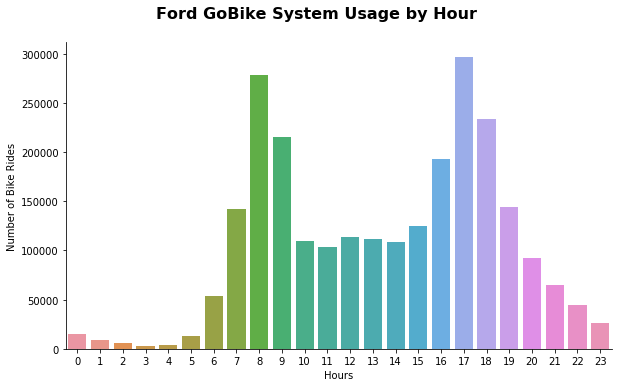

In [7]:
plt.figure(figsize=[ 11.69, 8.27]);
graph = sb.catplot(data = df_master_cleaned, x='start_time_hour', 
                   kind='count', aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour',
                   y=1.07, fontsize=16, fontweight='bold');

## Ford GoBike System Trends by User Type

> In 2019, customers usage for the Ford GoBike is quite low and consistant staying under 10,000 bike trips during the week. While Subscribers frequently used the Ford GoBikes during Monday - Thursday with a drop of the number of bike trips on Friday and a significant drop through to Saturday and Sunday.

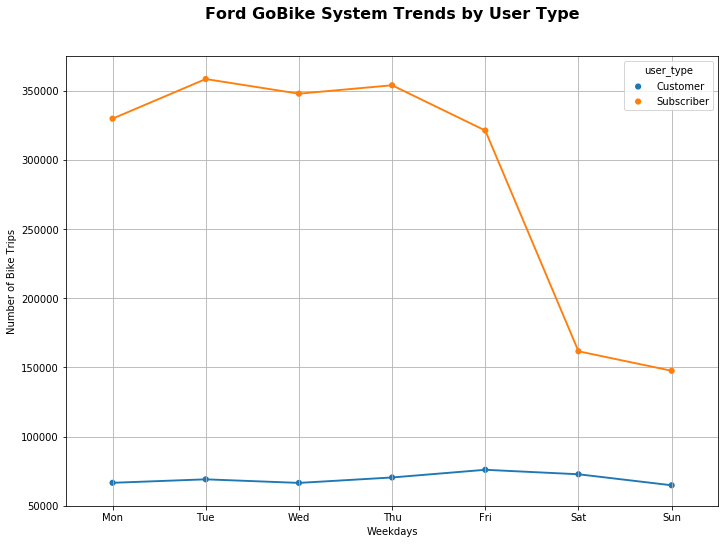

In [10]:
# Compare the Customer and Subscriber Trends over the week 
plt.figure(figsize=[ 11.69, 8.27]);
df_master_cleaned_user_week = df_master_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_master_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);
plt.title('Ford GoBike System Trends by User Type', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Summary of Findings

There are two types of Ford GoBike clients using the Ford GoBike System which are Customers and Subscribers. Through analysis:
* Subscribers that are using Ford GoBike which are primarily daily commuters who rent a bike on weekdays around 8-9am and 5-6pm. 
* Customers are casually using the Ford GoBikes which mainly occur from Friday through to Sunday.


jupyter nbconvert Ford_GoBike_slide_deck_Tash.ipynb --to slides --post serve --template output_toggle